In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape((60000,28,28,1))
X_train=X_train.astype('float32')/255
X_test=X_test.reshape((10000,28,28,1))
X_test=X_test.astype('float32')/255

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

from keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=64)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
test_loss,test_acc=model.evaluate(X_test,y_test)
test_acc

10000/10000 [==============================] - 0s 28us/step


0.9907

In [2]:
import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/nagae/study/deep-learning-with-python-notebooks/dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '/home/nagae/study/deep-learning-with-python-notebooks/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('cat image:',len(os.listdir(train_cats_dir)))
print('dog image:',len(os.listdir(train_dogs_dir)))
print('cat validation image:',len(os.listdir(validation_cats_dir)))
print('dog validation image:',len(os.listdir(validation_dogs_dir)))

cat image: 1000
dog image: 1000
cat validation image: 500
dog validation image: 500


In [4]:
from keras import  layers,models,optimizers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2,)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2,)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras.preprocessing.image import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

for data_batch,labels_batch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('label batch shape:', labels_batch.shape)
        break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


In [11]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=30,
                            validation_data=validation_generator,
                            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6906 - acc: 0.5425 - val_loss: 0.6710 - val_acc: 0.5920
Epoch 2/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6657 - acc: 0.6005 - val_loss: 0.6563 - val_acc: 0.6020
Epoch 3/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6253 - acc: 0.6425 - val_loss: 0.6268 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 5s 47ms/step - loss: 0.5883 - acc: 0.6925 - val_loss: 0.6042 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5513 - acc: 0.7210 - val_loss: 0.5852 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5164 - acc: 0.7435 - val_loss: 0.5713 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 5s 48ms/step - loss: 0.4917 - acc: 0.7560 - val_loss: 0.5636 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 5s 49ms/step - 

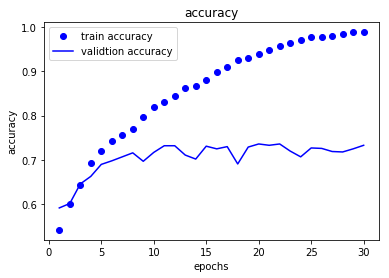

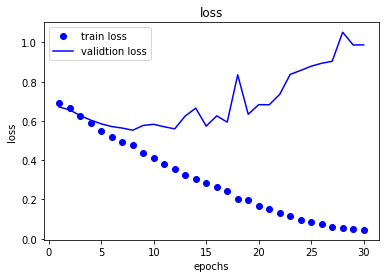

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'b',label='validtion accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='train loss')
plt.plot(epochs,val_loss,'b',label='validtion loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.show()


In [14]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

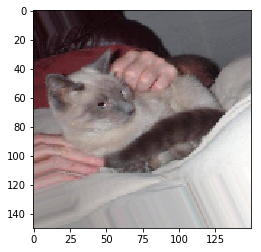

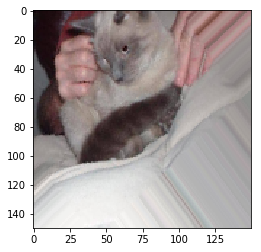

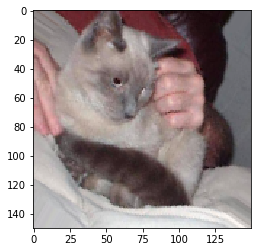

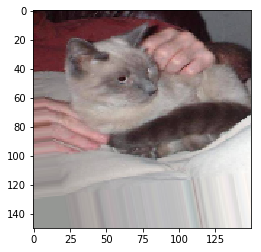

In [35]:
from keras.preprocessing import image

frames=[os.path.join(train_cats_dir,frame)
        for frame in os.listdir(train_cats_dir)]
img_path=frames[3]
img=image.load_img(img_path,target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)


i=0
for batch in datagen.flow(x,batch_size=1):
 #   plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 ==0:
        break
    plt.show()

In [36]:
from keras import  layers,models,optimizers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2,)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2,)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [40]:
train_datagen=ImageDataGenerator(rescale=1./255,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

for data_batch,labels_batch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('label batch shape:', labels_batch.shape)
        break


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 150, 150, 3)
label batch shape: (32,)


In [41]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
    

Epoch 1/30
100/100 [==============================] - 17s 170ms/step - loss: 0.6924 - acc: 0.5200 - val_loss: 0.6969 - val_acc: 0.5070
Epoch 2/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6768 - acc: 0.5625 - val_loss: 0.6940 - val_acc: 0.5509
Epoch 3/30
100/100 [==============================] - 15s 153ms/step - loss: 0.6641 - acc: 0.5844 - val_loss: 0.6543 - val_acc: 0.6098
Epoch 4/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6477 - acc: 0.6234 - val_loss: 0.6489 - val_acc: 0.6031
Epoch 5/30
100/100 [==============================] - 15s 154ms/step - loss: 0.6266 - acc: 0.6459 - val_loss: 0.6190 - val_acc: 0.6332
Epoch 6/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6101 - acc: 0.6625 - val_loss: 0.5889 - val_acc: 0.6765
Epoch 7/30
100/100 [==============================] - 15s 154ms/step - loss: 0.5961 - acc: 0.6781 - val_loss: 0.5873 - val_acc: 0.6904
Epoch 8/30
100/100 [==============================] - 1

In [42]:
model.save("cats_and_dogs_small_2.h5")

In [44]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

58892288/58889256 [==============================] - 7s 0us/step


In [45]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [46]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/nagae/study/deep-learning-with-python-notebooks/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [51]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)

train_features=train_features.reshape(2000,4*4*512)
validation_features=validation_features.reshape(1000,4*4*512)
test_features=test_features.reshape(1000,4*4*512)

(2000, 4, 4, 512)
(1000, 4, 4, 512)
(1000, 4, 4, 512)


In [56]:
from keras import models,layers,optimizers
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_features,train_labels,
                  epochs=30,
                  batch_size=20,
                  validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 264us/step - loss: 0.4551 - acc: 0.7685 - val_loss: 0.2901 - val_acc: 0.8870
Epoch 2/30
2000/2000 [==============================] - 0s 147us/step - loss: 0.2915 - acc: 0.8775 - val_loss: 0.2612 - val_acc: 0.8890
Epoch 3/30
2000/2000 [==============================] - 0s 142us/step - loss: 0.2349 - acc: 0.9040 - val_loss: 0.2416 - val_acc: 0.9030
Epoch 4/30
2000/2000 [==============================] - 0s 142us/step - loss: 0.2011 - acc: 0.9175 - val_loss: 0.3541 - val_acc: 0.8410
Epoch 5/30
2000/2000 [==============================] - 0s 142us/step - loss: 0.1784 - acc: 0.9325 - val_loss: 0.2465 - val_acc: 0.9000
Epoch 6/30
2000/2000 [==============================] - 0s 141us/step - loss: 0.1488 - acc: 0.9410 - val_loss: 0.2384 - val_acc: 0.9060
Epoch 7/30
2000/2000 [==============================] - 0s 141us/step - loss: 0.1370 - acc: 0.9475 - val_loss: 0.2412 - val_acc: 0.9030


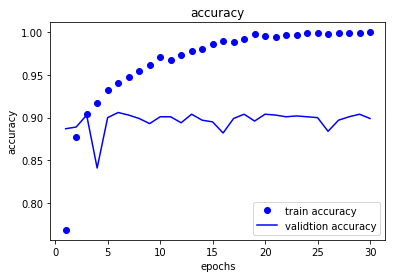

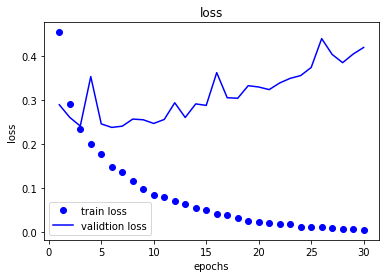

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'b',label='validtion accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='train loss')
plt.plot(epochs,val_loss,'b',label='validtion loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.show()

In [58]:
loss,score=model.evaluate(test_features,test_labels)

1000/1000 [==============================] - 0s 58us/step


In [60]:
print("loss:",loss)
print("acc:",score)

loss: 0.45157216644287107
acc: 0.885


In [64]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

conv_base.trainable=False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

model.summary()


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
 - 11s - loss: 0.6735 - acc

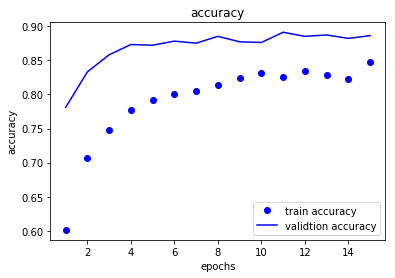

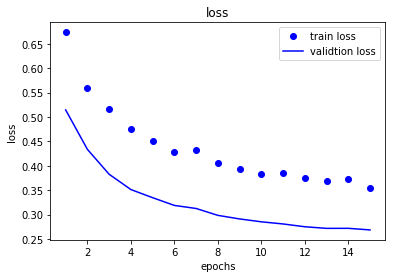

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc,'b',label='validtion accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='train loss')
plt.plot(epochs,val_loss,'b',label='validtion loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.show()

In [66]:
conv_base.trainable=True

set_trainable=False
for layer in conv_base.layers:
    if layer.name=='blocl5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15
 - 11s - loss: 0.3649 - acc: 0.8355 - val_loss: 0.2631 - val_acc: 0.8880
Epoch 2/15
 - 10s - loss: 0.3513 - acc: 0.8330 - val_loss: 0.2614 - val_acc: 0.8930
Epoch 3/15
 - 10s - loss: 0.3537 - acc: 0.8430 - val_loss: 0.2614 - val_acc: 0.8880
Epoch 4/15
 - 10s - loss: 0.3387 - acc: 0.8515 - val_loss: 0.2602 - val_acc: 0.8900
Epoch 5/15
 - 10s - loss: 0.3503 - acc: 0.8440 - val_loss: 0.2555 - val_acc: 0.8930
Epoch 6/15
 - 10s - loss: 0.3353 - acc: 0.8555 - val_loss: 0.2508 - val_acc: 0.8930
Epoch 7/15
 - 10s - loss: 0.3437 - acc: 0.8420 - val_loss: 0.2520 - val_acc: 0.8910
Epoch 8/15
 - 10s - loss: 0.3334 - acc: 0.8590 - val_loss: 0.2480 - val_acc: 0.8950
Epoch 9/15
 - 10s - loss: 0.3351 - acc: 0.8540 - val_loss: 0.2495 - val_acc: 0.8970
Epoch 10/15
 - 10s - loss: 0.3417 - acc: 0.8510 - val_loss: 0.2476 - val_acc: 0.9000
Epoch 11/15
 - 10s - loss: 0.3232 - acc: 0.8580 - val_loss: 0.2511 - val_acc: 0.8950
Epoch 12/15
 - 10s - loss: 0.3285 - acc: 0.8565 - val_loss: 0.2460 - val_a

In [4]:
from keras.applications import VGG16
from keras import backend as K

model=VGG16(weights='imagenet',include_top=False)
model.summary()

layer_name='block3_conv1'
filter_index=0

layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [22]:
#print(layer_output)
gradient_all=K.gradients(loss,model.input)
grads=K.gradients(loss,model.input)[0]

grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

In [27]:
iterate=K.function([model.input],[loss,grads])
import numpy as np
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

NameError: name 'K' is not defined

In [25]:
input_img_data=np.random.random((1,150,150,3))*20+128
step=1.
for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step
    

In [33]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1
    
    x+=0.5
    x=np.clip(x,0,1)
    
    x*=255
    x=np.clip(x,0,255).astype('uint8')
    return x

In [34]:
def generate_pattern(layer_name,filter_index,size=150):
    layer_output=model.get_layer(layer_name).output
    loss=K.mean(layer_output[:,:,:,filter_index])
    grads=K.gradients(loss,model.input)[0]
    grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
    iterate=K.function([model.input],[loss,grads])
    input_img_data=np.random.random((1,size,size,3))*20+128.
    step=1.
    for i in range(40):
        loss_value,grads_value=iterate([input_img_data])
        input_img_data+=grads_value*step
    img=input_img_data[0]
    return deprocess_image(img)

In [5]:
import matplotlib.pyplot  as plt
%matplotlib inline
plt.imshow(generate_pattern('block3_conv1',0))
plt.imshow()

NameError: name 'generate_pattern' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


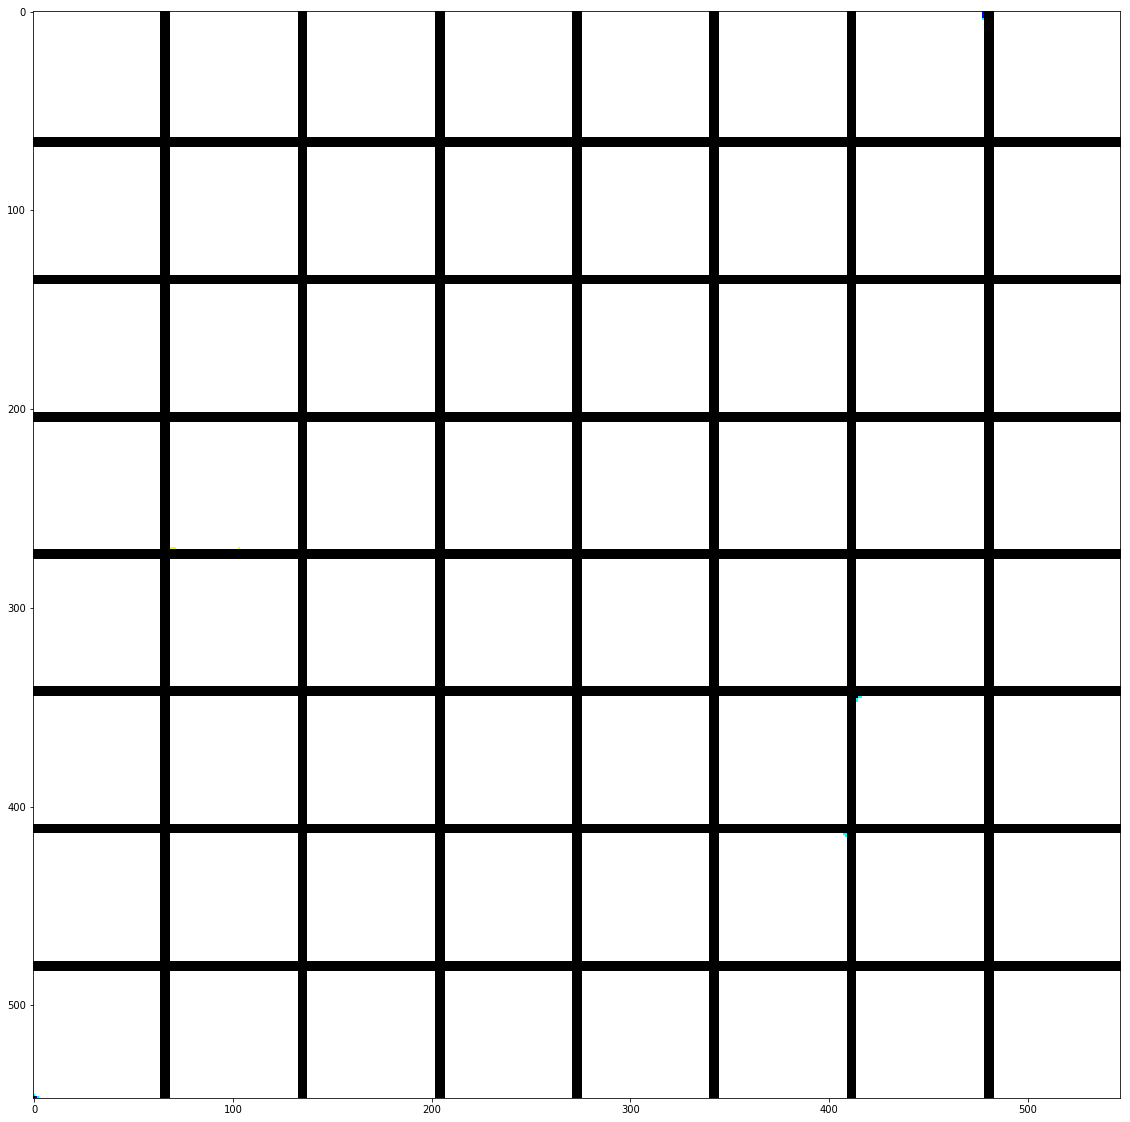

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


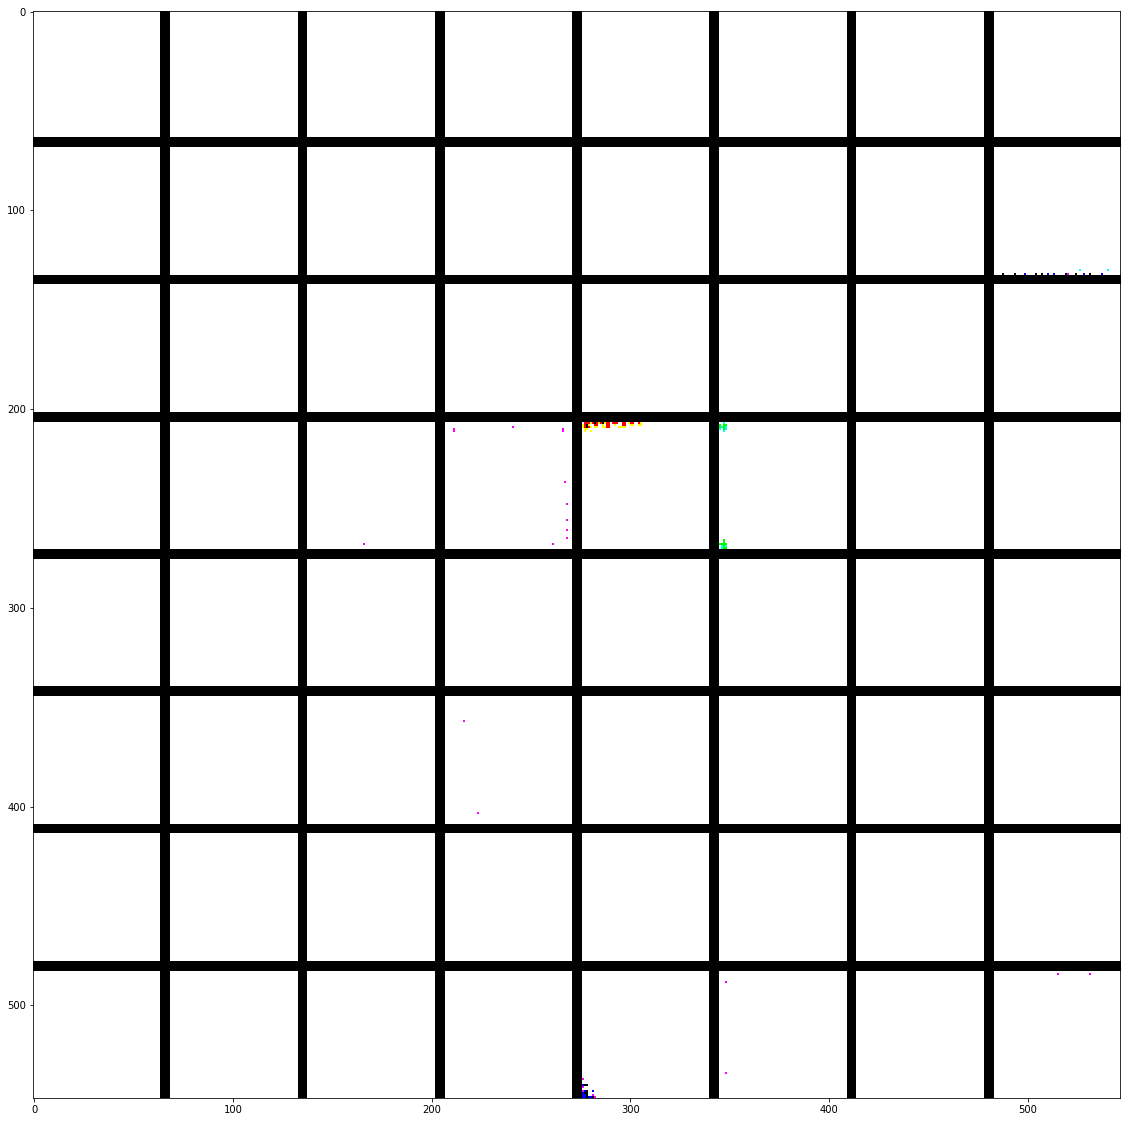

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


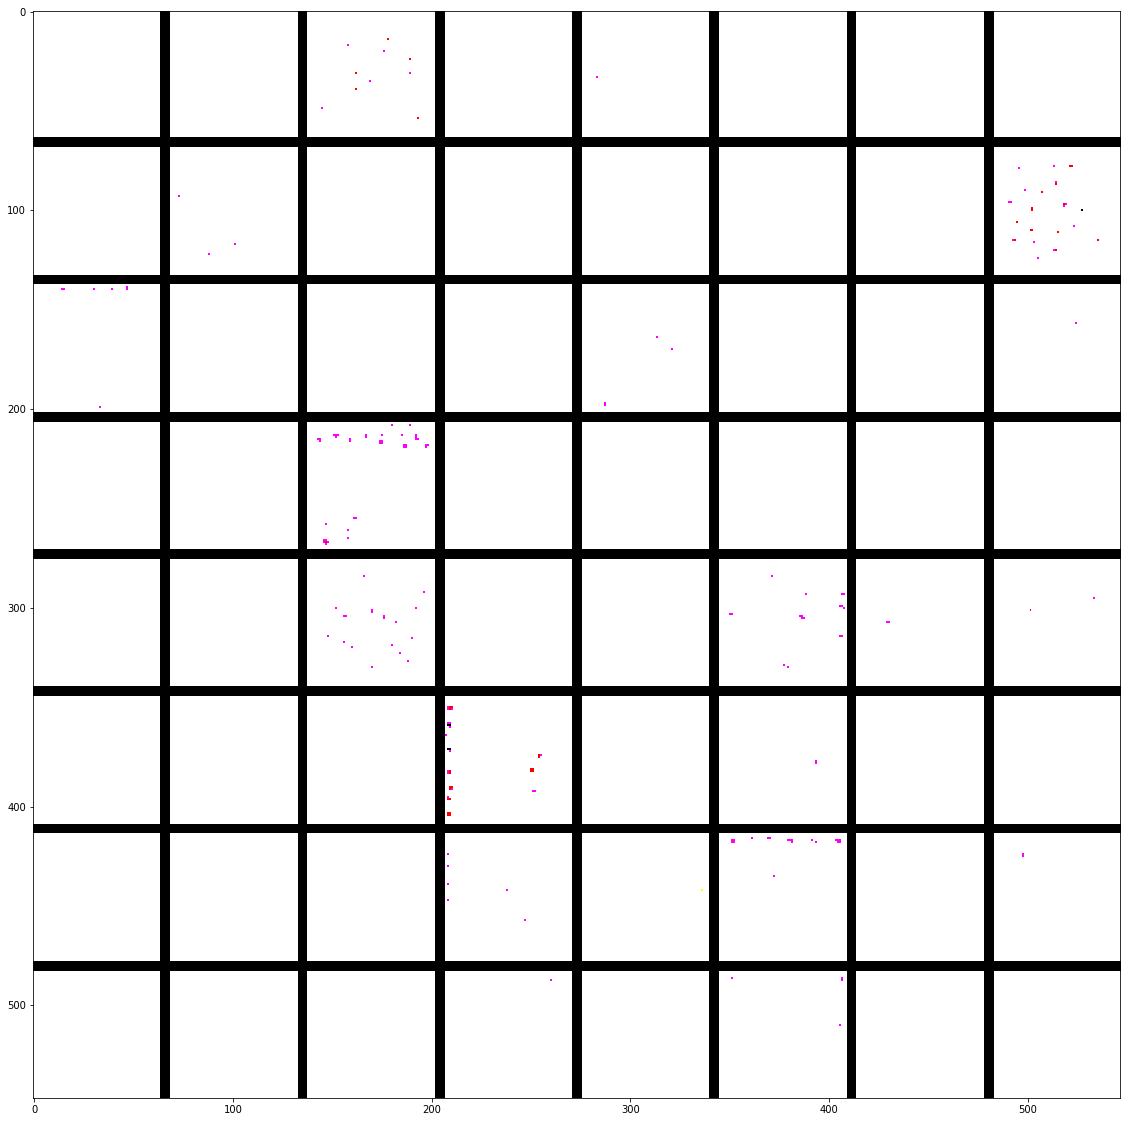

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


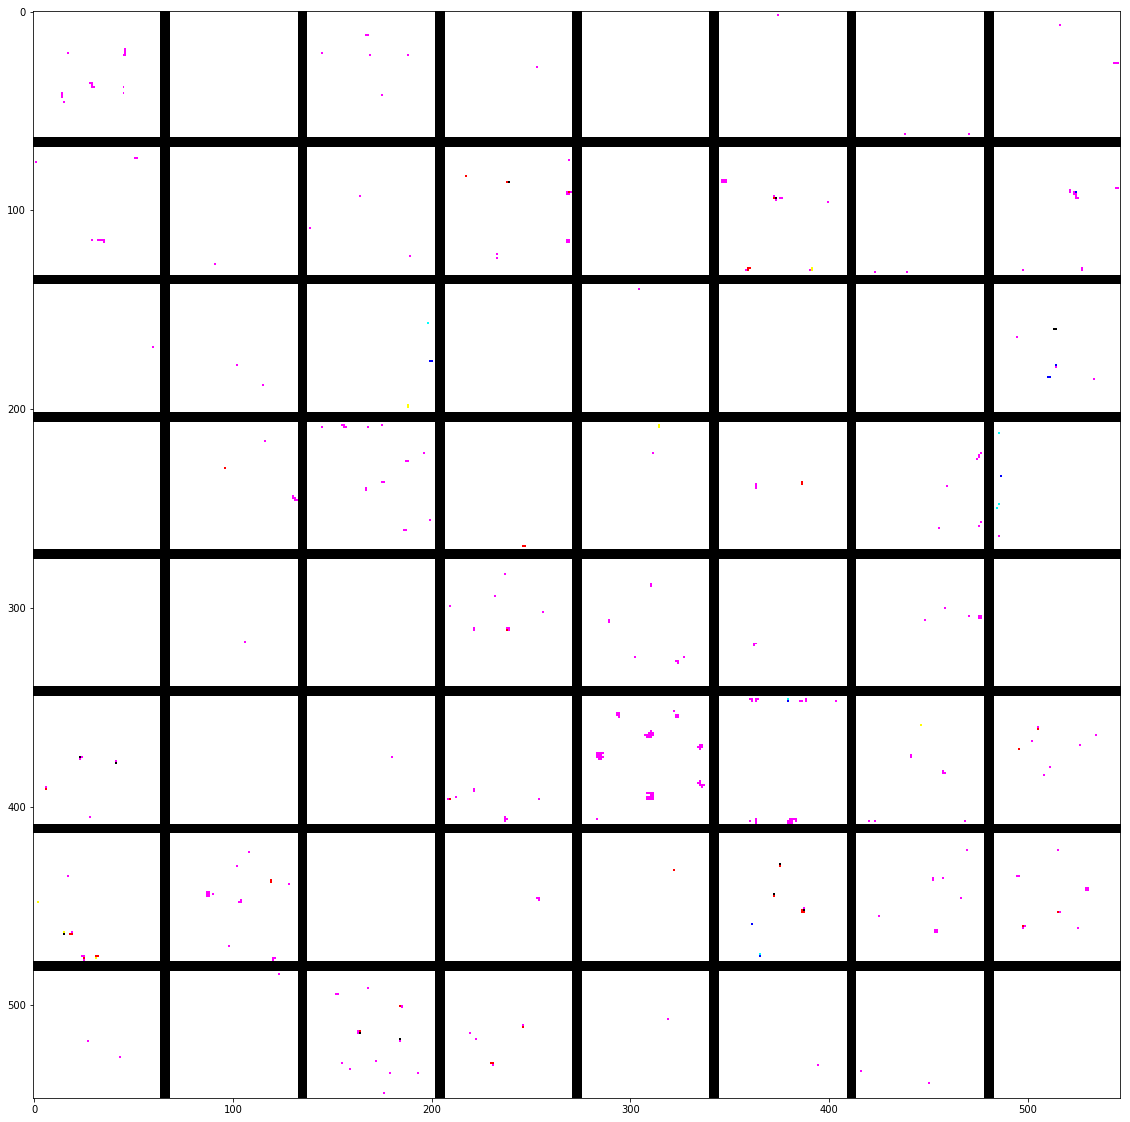

In [38]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

In [24]:
from keras.applications.vgg16 import VGG16

model=VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path='/home/nagae/study/deep-learning-with-python-notebooks/elephant.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

preds=model.predict(x)
print("predict:",decode_predictions(preds,top=3)[0])

40960/35363 [==================================] - 0s 5us/step
predict: [('n02504458', 'African_elephant', 0.7408773), ('n01871265', 'tusker', 0.22559176), ('n02504013', 'Indian_elephant', 0.015767366)]


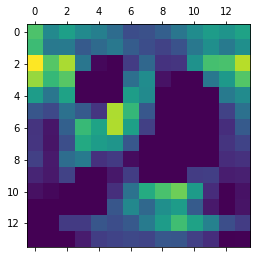

In [43]:
from keras import backend as K
np.argmax(preds[0])

african_elephant_output=model.output[:,386]

last_conv_layer=model.get_layer('block5_conv3')
grads=K.gradients(african_elephant_output,last_conv_layer.output)[0]
pooled_grads=K.mean(grads,axis=(0,1,2))

iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value,conv_layer_output_value=iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
    
heatmap=np.mean(conv_layer_output_value,axis=-1)
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)


In [50]:
import cv2
img=cv2.imread(img_path)
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
superimposed_img=heatmap*0.4+img
cv2.imwrite('/home/nagae/study/deep-learning-with-python-notebooks/elephant_cam.jpg',superimposed_img)


TypeError: Required argument 'mat' (pos 2) not found

In [47]:
print(heatmap.shape)

(800, 1200)
